#### K-Means Clustering for Customer Segmentation


<small>

**Step 1: Import Required Libraries**  
- `pandas`, `numpy` → Data handling & numerical operations  
- `matplotlib.pyplot` → Visualizations  
- `KMeans` → K-Means clustering  
- `StandardScaler` → Feature scaling  
- `silhouette_score` → Clustering quality evaluation  
- `PCA` → Dimensionality reduction for visualization  

</small>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

<small>

**Step 2: Load Dataset**  
- Use `pd.read_csv('Mall_Customers.csv')` to load the customer dataset into a DataFrame `df`.  
- This dataset contains customer demographic and spending data for clustering analysis.  

</small>


In [2]:
df = pd.read_csv('Mall_Customers.csv') 

<small>

**Step 3: Preview Dataset**  
- `df.head()` displays the first 5 rows of the dataset.  
- Helps verify successful loading and understand the structure of the data.  

</small>


In [3]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


<small>

**Step 4: Dataset Information**  
- `df.info()` shows column names, data types, and non-null counts.  
- Useful for detecting missing values and understanding data types before preprocessing.  

</small>


In [5]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


<small>

**Step 5: Select Features for Clustering**  
- Extract `Annual Income (k$)` and `Spending Score (1-100)` into variable `X`.  
- These two features will be used for K-Means clustering.  

</small>


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

<small>

**Step 6: Initialize Scaler**  
- Create a `StandardScaler()` instance to standardize features.  
- Ensures both features have mean 0 and standard deviation 1 for better clustering results.  

</small>


In [7]:
scaler = StandardScaler()

<small>

**Step 7: Scale Features**  
- Apply `scaler.fit_transform(X)` to standardize the selected features.  
- Stores the scaled data in `X_scaled` for use in K-Means clustering.  

</small>


In [8]:
X_scaled = scaler.fit_transform(X)

<small>

**Step 8: Initialize Evaluation Variables**  
- `wcss` → List to store Within-Cluster Sum of Squares for each K.  
- `silhouette_scores` → List to store silhouette scores for each K.  
- `K_range` → Range of cluster numbers (2 to 10) to test in K-Means.  

</small>

In [9]:
wcss = [] 
silhouette_scores = []
K_range = range(2, 11)

<small>

**Step 9: Run K-Means for Different Cluster Counts**  
- Loop through each `k` in `K_range`.  
- Create and fit a `KMeans` model (`init='k-means++'` for better initialization).  
- Append model inertia (WCSS) to `wcss`.  
- Compute and store silhouette scores for each K (requires ≥ 2 clusters).  

</small>


In [10]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(0)

c:\Users\rajat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rajat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rajat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rajat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

<small>

**Step 10: Plot Elbow Method**  
- Create a figure with a subplot layout.  
- Plot `K_range` vs. `wcss` to visualize the **Elbow Method**.  
- The "elbow" point suggests the optimal number of clusters where WCSS reduction slows significantly.  

</small>


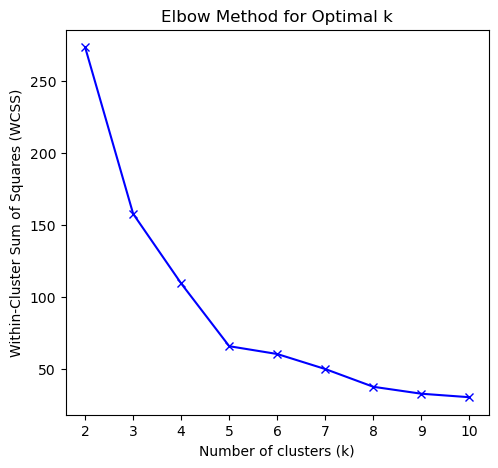

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')

# Save the figure
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')

plt.show()


<small>

**Step 11: Plot Silhouette Scores**  
- Plot `K_range[1:]` vs. `silhouette_scores[1:]` to evaluate clustering quality.  
- Higher silhouette scores indicate better-defined clusters.  
- Use `tight_layout()` for better spacing and `show()` to display both plots together.  

</small>


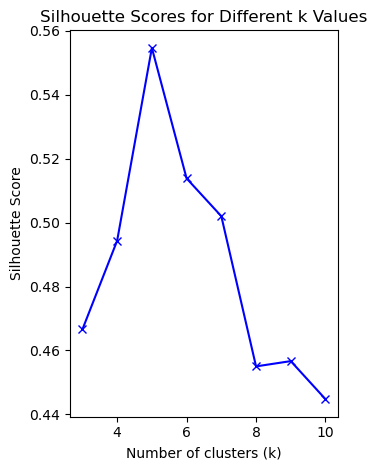

In [25]:
plt.subplot(1, 2, 2)
plt.plot(K_range[1:], silhouette_scores[1:], 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.tight_layout()
plt.savefig('silhouette.png', dpi=300, bbox_inches='tight')

plt.show()


<small>

**Step 12: Set Optimal Number of Clusters**  
- Based on the Elbow Method and Silhouette Scores, choose `optimal_k = 5` for K-Means clustering.  

</small>


In [13]:
optimal_k = 5

<small>

**Step 13: Initialize Final K-Means Model**  
- Create a `KMeans` instance with `n_clusters=optimal_k` (5).  
- Use `init='k-means++'` for better initial centroids and `random_state=42` for reproducibility.  

</small>


In [14]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

<small>

**Step 14: Fit Model and Assign Clusters**  
- Fit the K-Means model to `X_scaled` and predict cluster labels.  
- Store the cluster assignments in `clusters` for each data point.  

</small>


In [15]:
clusters = kmeans.fit_predict(X_scaled)

c:\Users\rajat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<small>

**Step 15: Add Cluster Labels to DataFrame**  
- Create a new column `Cluster` in `df` to store the assigned cluster for each customer.  

</small>


In [16]:
df['Cluster'] = clusters

<small>

**Step 16: Plot Clusters**  
- Create a scatter plot for each cluster.  
- Different colors represent different clusters based on `Annual Income` and `Spending Score`.  

</small>


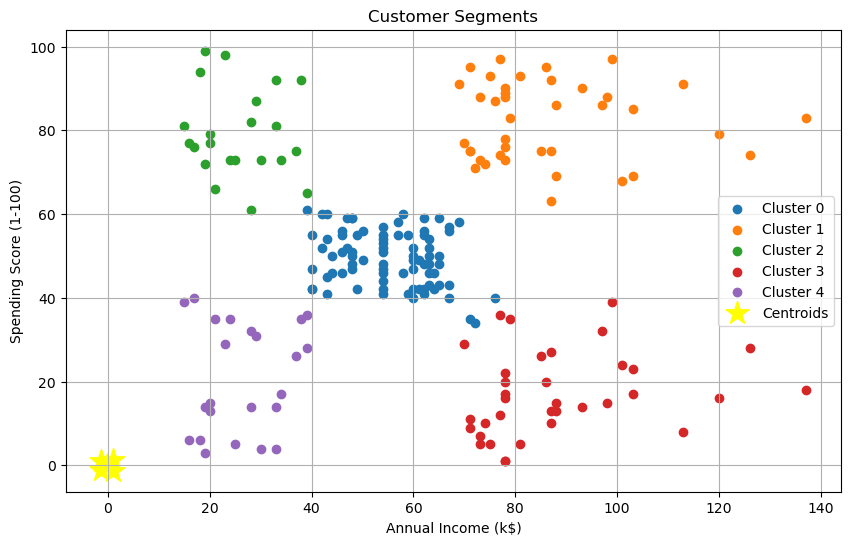

In [29]:
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Annual Income (k$)'], 
                df[df['Cluster'] == i]['Spending Score (1-100)'], 
                label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='*')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.savefig('customer_segments.png', dpi=300, bbox_inches='tight')

plt.show()


<small>

**Step 17: Highlight Cluster Centroids & Finalize Plot**  
- Plot cluster centroids as yellow stars (`marker='*'`).  
- Add title, axis labels, legend, and grid for clarity.  
- Display the final customer segmentation chart.  

</small>


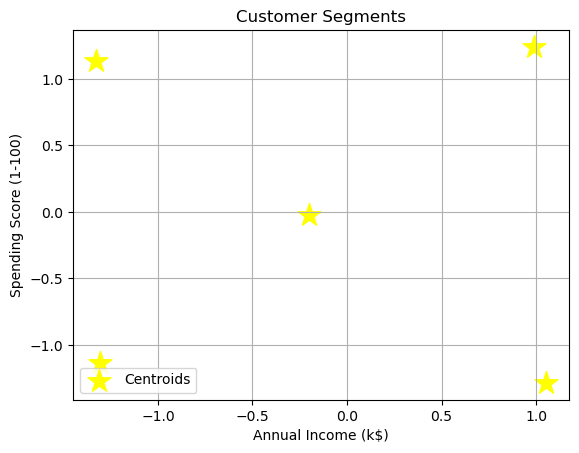

In [28]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='*')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()

# Save the figure
plt.savefig('centroids.png', dpi=300, bbox_inches='tight')

plt.show()


<small>

**Step 18: Evaluate Clustering with Silhouette Score**  
- Compute the average silhouette score for `optimal_k` clusters.  
- Higher score → better-defined, well-separated clusters.  
- Print the result for performance assessment.  

</small>


In [19]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score for k={optimal_k}: {silhouette_avg:.3f}")


Silhouette Score for k=5: 0.555


<small>

**Step 19: Create Cluster Summary Table**  
- Group data by `Cluster` and calculate:  
  - Mean `Age`, `Annual Income`, and `Spending Score`.  
  - Most frequent (`mode`) `Gender`.  
  - Count of customers per cluster.  
- Rename `CustomerID` column to `Count` for clarity.  

</small>


In [20]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.mode()[0],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

<small>

**Step 20: Display Cluster Summary**  
- Print the aggregated statistics for each cluster to understand customer group characteristics.  

</small>


In [21]:
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)  Gender  Count
Cluster                                                                      
0        42.716049           55.296296               49.518519  Female     81
1        32.692308           86.538462               82.128205  Female     39
2        25.272727           25.727273               79.363636  Female     22
3        41.114286           88.200000               17.114286    Male     35
4        45.217391           26.304348               20.913043  Female     23
